In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('StudentsPerformance.csv')
dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df = dataframe.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.duplicated().sum()

0

<br><br> 
## Dummy Variables 

In [6]:
df.gender

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [7]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [8]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [9]:
df['race/ethnicity']

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object

In [10]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [11]:
for column in df.columns[0:4]:
    print(df[column].value_counts())
    print()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

standard        645
free/reduced    355
Name: lunch, dtype: int64

none         642
completed    358
Name: test preparation course, dtype: int64



In [12]:
from sklearn.preprocessing import LabelEncoder

race_encoder = LabelEncoder()
df['race/ethnicity'] = race_encoder.fit_transform(df['race/ethnicity'])

In [13]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_male
0,1,bachelor's degree,standard,none,72,72,74,0
1,2,some college,standard,completed,69,90,88,0
2,1,master's degree,standard,none,90,95,93,0
3,0,associate's degree,free/reduced,none,47,57,44,1
4,2,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...
995,4,master's degree,standard,completed,88,99,95,0
996,2,high school,free/reduced,none,62,55,55,1
997,2,high school,free/reduced,completed,59,71,65,0
998,3,some college,standard,completed,68,78,77,0


In [14]:
df = pd.get_dummies(df, columns=['parental level of education', 'lunch', 'test preparation course'], drop_first=True)

In [15]:
df

,race/ethnicity,math score,reading score,writing score,gender_male,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,1,72,72,74,0,1,0,0,0,0,1,1
1,2,69,90,88,0,0,0,0,1,0,1,0
2,1,90,95,93,0,0,0,1,0,0,1,1
3,0,47,57,44,1,0,0,0,0,0,0,1
4,2,76,78,75,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,88,99,95,0,0,0,1,0,0,1,0
996,2,62,55,55,1,0,1,0,0,0,0,1
997,2,59,71,65,0,0,1,0,0,0,0,0
998,3,68,78,77,0,0,0,0,1,0,1,0


In [16]:
df.describe()

,race/ethnicity,math score,reading score,writing score,gender_male,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.174000,66.08900,69.169000,68.054000,0.482000,0.11800,0.196000,0.059000,0.226000,0.179000,0.645000,0.642000
std,1.157179,15.16308,14.600192,15.195657,0.499926,0.32277,0.397167,0.235743,0.418448,0.383544,0.478753,0.479652
min,0.000000,0.00000,17.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,57.00000,59.000000,57.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,66.00000,70.000000,69.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,3.000000,77.00000,79.000000,79.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,100.00000,100.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X = df.drop(columns = df.columns[1:4]).values
y = df[df.columns[1:4]].values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [19]:
X_train

array([[3, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 1, 1],
       [2, 1, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 1, 1]], dtype=int32)

<br>

### Test Score Function

In [20]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns = df.columns[1:4]).values
y = df[df.columns[1:4]].values

def test_score(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
    regression = LinearRegression()
    regression.fit(X_train, y_train)
    predicted = regression.predict(X_test)
    
    print(mean_absolute_error(predicted, y_test))


In [21]:
test_score(X, y)

10.627317301489635


In [22]:
df.corr()

,race/ethnicity,math score,reading score,writing score,gender_male,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
race/ethnicity,1.000000,0.216415,0.145253,0.165691,-0.001502,-0.001426,-0.065567,0.061404,0.051011,-0.070246,0.046563,-0.017508
math score,0.216415,1.000000,0.817580,0.802642,0.167982,0.079664,-0.128725,0.060417,0.037056,-0.079852,0.350877,-0.177702
reading score,0.145253,0.817580,1.000000,0.954598,-0.244313,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.229560,-0.241780
writing score,0.165691,0.802642,0.954598,1.000000,-0.301225,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.245769,-0.312946
gender_male,-0.001502,0.167982,-0.244313,-0.301225,1.000000,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
parental level of education_bachelor's degree,-0.001426,0.079664,0.096024,0.128297,-0.011638,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
parental level of education_high school,-0.065567,-0.128725,-0.151068,-0.182211,0.037952,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446
parental level of education_master's degree,0.061404,0.060417,0.106452,0.125693,-0.046188,-0.091588,-0.123632,1.000000,-0.135305,-0.116919,-0.027095,0.009933
parental level of education_some college,0.051011,0.037056,0.010782,0.027989,-0.004460,-0.197647,-0.266799,-0.135305,1.000000,-0.252312,0.006146,0.019490
parental level of education_some high school,-0.070246,-0.079852,-0.071369,-0.097326,0.008990,-0.170790,-0.230545,-0.116919,-0.252312,1.000000,0.013874,-0.070289


In [23]:
df1 = dataframe.copy()

In [24]:
df1 = pd.get_dummies(df1, columns=['gender','lunch','test preparation course'], drop_first=True)

In [25]:
df1

,race/ethnicity,parental level of education,math score,reading score,writing score,gender_male,lunch_standard,test preparation course_none
0,group B,bachelor's degree,72,72,74,0,1,1
1,group C,some college,69,90,88,0,1,0
2,group B,master's degree,90,95,93,0,1,1
3,group A,associate's degree,47,57,44,1,0,1
4,group C,some college,76,78,75,1,1,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,88,99,95,0,1,0
996,group C,high school,62,55,55,1,0,1
997,group C,high school,59,71,65,0,0,0
998,group D,some college,68,78,77,0,1,0


<br><br><br>

## Feature Engineering: Imperio Methods

#### Frequency Imputation

In [26]:
from imperio import FrequencyImputationTransformer

freq = FrequencyImputationTransformer(index = [0,1])

In [27]:
df1

,race/ethnicity,parental level of education,math score,reading score,writing score,gender_male,lunch_standard,test preparation course_none
0,group B,bachelor's degree,72,72,74,0,1,1
1,group C,some college,69,90,88,0,1,0
2,group B,master's degree,90,95,93,0,1,1
3,group A,associate's degree,47,57,44,1,0,1
4,group C,some college,76,78,75,1,1,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,88,99,95,0,1,0
996,group C,high school,62,55,55,1,0,1
997,group C,high school,59,71,65,0,0,0
998,group D,some college,68,78,77,0,1,0


In [28]:
X = df1.drop(columns = df1.columns[2:5]).values
y = df1[df1.columns[2]].values

In [29]:
X

array([['group B', "bachelor's degree", 0, 1, 1],
       ['group C', 'some college', 0, 1, 0],
       ['group B', "master's degree", 0, 1, 1],
       ...,
       ['group C', 'high school', 0, 0, 0],
       ['group D', 'some college', 0, 1, 0],
       ['group D', 'some college', 0, 0, 1]], dtype=object)

In [30]:
freq.fit(X,y)

FrequencyImputationTransformer(index=[0, 1])

In [31]:
freq.transform(X)

ValueError: invalid literal for int() with base 10: 'group B'

In [32]:
race_encoder = LabelEncoder()
df1['race/ethnicity'] = race_encoder.fit_transform(df1['race/ethnicity'])

In [33]:
education_encoder = LabelEncoder()
df1['parental level of education'] = education_encoder.fit_transform(df1['parental level of education'])

In [34]:
X = df1.drop(columns = df1.columns[2:5]).values
y = df1[df1.columns[2:5]].values

In [35]:
freq.fit(X,y)

FrequencyImputationTransformer(index=[0, 1])

In [36]:
X = freq.transform(X)

In [37]:
pd.DataFrame(X).describe()

,0,1,2,3,4
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,0.482000,0.645000,0.642000
std,0.0,0.0,0.499926,0.478753,0.479652
min,0.0,0.0,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,1.000000,1.000000
75%,0.0,0.0,1.000000,1.000000,1.000000
max,0.0,0.0,1.000000,1.000000,1.000000


In [38]:
test_score(X, y)

11.053659374376629


<br>

#### Target Imputation

In [39]:
from imperio import TargetImputationTransformer

targ = TargetImputationTransformer(index=[0,1])

In [40]:
X = df1.drop(columns = df1.columns[2:5]).values
y = df1[df1.columns[2:5]].values

In [41]:
targ.fit(X,y)

TargetImputationTransformer(index=[0, 1])

In [42]:
X = targ.transform(X)

In [43]:
X

array([[65., 71.,  0.,  1.,  1.],
       [67., 68.,  0.,  1.,  0.],
       [65., 73.,  0.,  1.,  1.],
       ...,
       [67., 63.,  0.,  0.,  0.],
       [69., 68.,  0.,  1.,  0.],
       [69., 68.,  0.,  0.,  1.]])

In [44]:
test_score(X,y)

10.542975853600398


In [45]:
X

array([[65., 71.,  0.,  1.,  1.],
       [67., 68.,  0.,  1.,  0.],
       [65., 73.,  0.,  1.,  1.],
       ...,
       [67., 63.,  0.,  0.,  0.],
       [69., 68.,  0.,  1.,  0.],
       [69., 68.,  0.,  0.,  1.]])

In [46]:
pd.DataFrame(np.hstack((X,y))).describe()

,0,1,2,3,4,5,6,7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,67.399000,67.354000,0.482000,0.645000,0.642000,66.08900,69.169000,68.054000
std,2.716833,2.976835,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657
min,62.000000,63.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,65.000000,65.000000,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,67.000000,68.000000,0.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,69.000000,69.000000,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,72.000000,73.000000,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000


<br>

#### Box-Cox transformation

In [47]:
from imperio import BoxCoxTransformer

cox = BoxCoxTransformer()

In [48]:
X[:,0:2]

array([[65., 71.],
       [67., 68.],
       [65., 73.],
       ...,
       [67., 63.],
       [69., 68.],
       [69., 68.]])

In [49]:
cox.fit(X[:,0:2], y)

BoxCoxTransformer()

In [50]:
pd.DataFrame(cox.transform(X[:,0:2])).describe()

,0,1
count,1000.000000,1000.000000
mean,14.416036,14.409884
std,0.331464,0.363092
min,13.748016,13.874508
25%,14.124515,14.124515
50%,14.370706,14.492423
75%,14.613248,14.613248
max,14.970563,15.088007


In [51]:
X[:,0:2] = cox.transform(X[:,0:2])

In [52]:
test_score(X, y)

10.544928043336261


<br>

#### Min Max Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [54]:
scaler.fit(X)

MinMaxScaler()

In [55]:
scaler.transform(X)

array([[0.30796341, 0.80576183, 0.        , 1.        , 1.        ],
       [0.50933812, 0.50920052, 0.        , 1.        , 0.        ],
       [0.30796341, 1.        , 0.        , 1.        , 1.        ],
       ...,
       [0.50933812, 0.        , 0.        , 0.        , 0.        ],
       [0.70772901, 0.50920052, 0.        , 1.        , 0.        ],
       [0.70772901, 0.50920052, 0.        , 0.        , 1.        ]])

In [56]:
X = scaler.transform(X)

In [57]:
test_score(X, y)

10.544928043336267


<br>

#### ZCA transformation

In [58]:
from imperio import ZCATransformer

zca = ZCATransformer()

In [59]:
zca.fit(X, y)

ZCATransformer()

In [60]:
X = zca.transform(X)
X

array([[-0.02085995,  0.04754387, -0.02218776,  0.03488581,  0.03398733],
       [ 0.01880742,  0.02532901, -0.01571683,  0.04432993, -0.02206068],
       [-0.02550638,  0.06553482, -0.02335097,  0.03301127,  0.03203121],
       ...,
       [ 0.04703863, -0.01218404, -0.00533162, -0.00817511, -0.0071184 ],
       [ 0.0371293 ,  0.02058324, -0.01779353,  0.04114567, -0.02483335],
       [ 0.03920398,  0.0201632 , -0.01726059, -0.02608777,  0.04120114]])

In [61]:
X

array([[-0.02085995,  0.04754387, -0.02218776,  0.03488581,  0.03398733],
       [ 0.01880742,  0.02532901, -0.01571683,  0.04432993, -0.02206068],
       [-0.02550638,  0.06553482, -0.02335097,  0.03301127,  0.03203121],
       ...,
       [ 0.04703863, -0.01218404, -0.00533162, -0.00817511, -0.0071184 ],
       [ 0.0371293 ,  0.02058324, -0.01779353,  0.04114567, -0.02483335],
       [ 0.03920398,  0.0201632 , -0.01726059, -0.02608777,  0.04120114]])

In [62]:
test_score(X, y)

10.544928043336268


<br><br>


## Feature Selection

#### PValueSelector

In [63]:
from kydavra import PValueSelector

selector = PValueSelector()

In [64]:
df2 = pd.DataFrame(np.hstack((X,y)), columns = dataframe.columns)
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,-0.020860,0.047544,-0.022188,0.034886,0.033987,72.0,72.0,74.0
1,0.018807,0.025329,-0.015717,0.044330,-0.022061,69.0,90.0,88.0
2,-0.025506,0.065535,-0.023351,0.033011,0.032031,90.0,95.0,93.0
3,-0.039006,0.040327,0.047832,-0.023025,0.043287,47.0,57.0,44.0
4,-0.005636,0.009270,0.035761,0.027180,0.027357,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,0.052381,0.059051,-0.023792,0.031718,-0.033861,88.0,99.0,95.0
996,0.022595,-0.028243,0.046146,-0.025325,0.042299,62.0,55.0,55.0
997,0.047039,-0.012184,-0.005332,-0.008175,-0.007118,59.0,71.0,65.0
998,0.037129,0.020583,-0.017794,0.041146,-0.024833,68.0,78.0,77.0


In [65]:
# Eu am 3 valori target dar nu pot folosi doar una ((
selector.select(df, target = 'math score')

['race/ethnicity',
 'reading score',
 'writing score',
 'gender_male',
 "parental level of education_bachelor's degree",
 'parental level of education_high school',
 "parental level of education_master's degree",
 'parental level of education_some high school',
 'lunch_standard',
 'test preparation course_none']

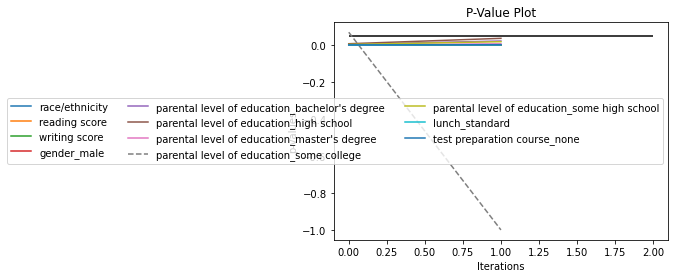

In [66]:
selector.plot_process()

<br>

#### Pearson Correlation Selector

In [67]:
from kydavra import PearsonCorrelationSelector

p = PearsonCorrelationSelector()

In [68]:
p.select(df2, 'math score')

[]

In [69]:
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,-0.020860,0.047544,-0.022188,0.034886,0.033987,72.0,72.0,74.0
1,0.018807,0.025329,-0.015717,0.044330,-0.022061,69.0,90.0,88.0
2,-0.025506,0.065535,-0.023351,0.033011,0.032031,90.0,95.0,93.0
3,-0.039006,0.040327,0.047832,-0.023025,0.043287,47.0,57.0,44.0
4,-0.005636,0.009270,0.035761,0.027180,0.027357,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,0.052381,0.059051,-0.023792,0.031718,-0.033861,88.0,99.0,95.0
996,0.022595,-0.028243,0.046146,-0.025325,0.042299,62.0,55.0,55.0
997,0.047039,-0.012184,-0.005332,-0.008175,-0.007118,59.0,71.0,65.0
998,0.037129,0.020583,-0.017794,0.041146,-0.024833,68.0,78.0,77.0


<br>

#### Point Biserial Correlation Selector

In [70]:
from kydavra import PointBiserialCorrSelector

biserial = PointBiserialCorrSelector()

In [71]:
biserial.select(df2, 'math score')

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'reading score',
 'writing score']

<br><br>

### Class Balancing

In [72]:
y

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [80]:
targets = pd.DataFrame(y, columns = dataframe.columns[-3:])
targets

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [81]:
targets.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:ylabel='Density'>

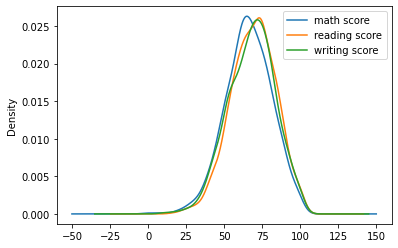

In [82]:
targets.plot(kind='density')

The targets are balanced